In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.55 MiB | 17.65 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━

In [ ]:
# 掛載 Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 指定你的 zip 路徑（請依實際修改）
zip_path = "/content/drive/MyDrive/dataset_all.zip"
base_dir = "/content/original_dataset"

# 解壓縮
from zipfile import ZipFile
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(base_dir)

print("✅ 解壓完成！")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 解壓完成！


In [ ]:
import os
from glob import glob
from PIL import Image
import shutil

# 設定來源與目標路徑
original_dir = "/content/original_dataset/dataset_all"
resized_dir = "/content/resized_dataset"
target_size = (224, 224)
splits = ["train", "val", "test"]

for split in splits:
    # 建立新目錄
    src_img_dir = os.path.join(original_dir, split, "images")
    src_lbl_dir = os.path.join(original_dir, split, "labels")
    dst_img_dir = os.path.join(resized_dir, split, "images")
    dst_lbl_dir = os.path.join(resized_dir, split, "labels")
    os.makedirs(dst_img_dir, exist_ok=True)
    os.makedirs(dst_lbl_dir, exist_ok=True)

    # Resize 圖片並儲存
    img_paths = sorted(glob(os.path.join(src_img_dir, "*")))
    for img_path in img_paths:
        try:
            with Image.open(img_path) as img:
                img_resized = img.resize(target_size)
                dst_path = os.path.join(dst_img_dir, os.path.basename(img_path))
                img_resized.save(dst_path)
        except Exception as e:
            print(f"❌ 無法處理圖片 {img_path}: {e}")

    # 複製 label
    lbl_paths = sorted(glob(os.path.join(src_lbl_dir, "*")))
    for lbl_path in lbl_paths:
        shutil.copy(lbl_path, os.path.join(dst_lbl_dir, os.path.basename(lbl_path)))

print("✅ 所有圖片已 resize 並複製 label 至 resized_dataset/")

✅ 所有圖片已 resize 並複製 label 至 resized_dataset/


In [ ]:
data_yaml = """
train: /content/resized_dataset/train/images
val: /content/resized_dataset/val/images

nc: 7
names: ['chiikawa', 'hachiware', 'kurimanju', 'momonga', 'rakko', 'shisa', 'usagi']
"""

with open("data.yaml", "w") as f:
    f.write(data_yaml)

print("✅ 已建立 data.yaml")

✅ 已建立 data.yaml


In [ ]:
%cd /content/yolov5
!python train.py --img 224 --batch 16 --epochs 100 --data data.yaml --weights yolov5s.pt --name yolo224_run1

串流輸出內容已截斷至最後 5000 行。
                   all        288        347      0.965      0.966      0.981      0.828

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  0% 0/144 [00:00<?, ?it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      83/99     0.854G     0.0196   0.008395    0.00394         40        224:   0% 0/144 [00:00<?, ?it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      83/99     0.854G    0.01713    0.00836   0.005245         42        224:   1% 2/144 [00:00<00:19,  7.42it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(

In [ ]:
!zip -r yolo224_run1.zip /content/yolov5/runs/train/yolo224_run1
from google.colab import files
files.download('yolo224_run1.zip')

  adding: content/yolov5/runs/train/yolo224_run1/ (stored 0%)
  adding: content/yolov5/runs/train/yolo224_run1/train_batch0.jpg (deflated 5%)
  adding: content/yolov5/runs/train/yolo224_run1/results.csv (deflated 83%)
  adding: content/yolov5/runs/train/yolo224_run1/train_batch1.jpg (deflated 7%)
  adding: content/yolov5/runs/train/yolo224_run1/results.png (deflated 8%)
  adding: content/yolov5/runs/train/yolo224_run1/confusion_matrix.png (deflated 22%)
  adding: content/yolov5/runs/train/yolo224_run1/P_curve.png (deflated 11%)
  adding: content/yolov5/runs/train/yolo224_run1/train_batch2.jpg (deflated 6%)
  adding: content/yolov5/runs/train/yolo224_run1/F1_curve.png (deflated 8%)
  adding: content/yolov5/runs/train/yolo224_run1/val_batch1_pred.jpg (deflated 20%)
  adding: content/yolov5/runs/train/yolo224_run1/val_batch1_labels.jpg (deflated 21%)
  adding: content/yolov5/runs/train/yolo224_run1/opt.yaml (deflated 50%)
  adding: content/yolov5/runs/train/yolo224_run1/weights/ (stored 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python detect.py \
  --weights runs/train/yolo224_run1/weights/best.pt \
  --img 224 \
  --conf 0.25 \
  --source /content/resized_dataset/test/images

detect: weights=['runs/train/yolo224_run1/weights/best.pt'], source=/content/resized_dataset/test/images, data=data/coco128.yaml, imgsz=[224, 224], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
image 1/288 /content/resized_dataset/test/images/case_001.jpg: 224x224 1 kurimanju, 6.5ms
image 2/288 /content/resized_dataset/test/images/case_002.jpg: 224x224 1 hachiware, 7.0ms
image 3/288 /content/resized_dataset/test/images/case_003.jpg: 224x224 1 momonga, 5.8ms
image 4/288 /content

In [ ]:
!zip -r exp2.zip /content/yolov5/runs/detect/exp2/
from google.colab import files
files.download('exp2.zip')

  adding: content/yolov5/runs/detect/exp2/ (stored 0%)
  adding: content/yolov5/runs/detect/exp2/case_126.jpg (deflated 3%)
  adding: content/yolov5/runs/detect/exp2/case_104.jpg (deflated 2%)
  adding: content/yolov5/runs/detect/exp2/case_060.jpg (deflated 3%)
  adding: content/yolov5/runs/detect/exp2/case_200.jpg (deflated 3%)
  adding: content/yolov5/runs/detect/exp2/case_181.jpg (deflated 3%)
  adding: content/yolov5/runs/detect/exp2/case_154.jpg (deflated 4%)
  adding: content/yolov5/runs/detect/exp2/case_056.jpg (deflated 4%)
  adding: content/yolov5/runs/detect/exp2/case_075.jpg (deflated 4%)
  adding: content/yolov5/runs/detect/exp2/case_105.jpg (deflated 4%)
  adding: content/yolov5/runs/detect/exp2/case_268.jpg (deflated 4%)
  adding: content/yolov5/runs/detect/exp2/case_112.jpg (deflated 3%)
  adding: content/yolov5/runs/detect/exp2/case_034.jpg (deflated 3%)
  adding: content/yolov5/runs/detect/exp2/case_275.jpg (deflated 3%)
  adding: content/yolov5/runs/detect/exp2/case_1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

detect: weights=['runs/train/yolo224_run1/weights/best.pt'], source=/content/resized_dataset/test/images, data=data/coco128.yaml, imgsz=[224, 224], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
image 1/288 /content/resized_dataset/test/images/case_001.jpg: 224x224 1 kurimanju, 11.4ms
image 2/288 /content/resized_dataset/test/images/case_002.jpg: 224x224 1 hachiware, 7.8ms
image 3/288 /content/resized_dataset/test/images/case_003.jpg: 224x224 1 momonga, 7.5ms
image 4/288 /content/

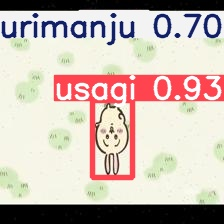

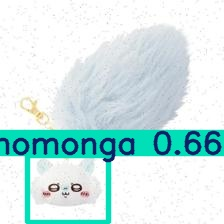

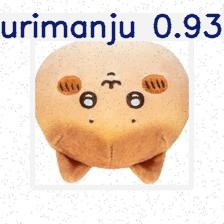

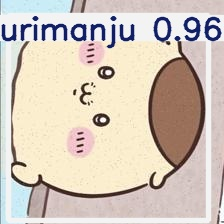

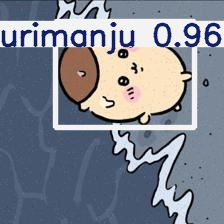

In [ ]:
# === 1. 推論（detect.py） ===
!python detect.py \
  --weights runs/train/yolo224_run1/weights/best.pt \
  --img 224 \
  --conf 0.25 \
  --source /content/resized_dataset/test/images \
  --save-txt \
  --save-conf

# === 2. 顯示推論圖像 ===
from IPython.display import Image, display
import glob

image_paths = glob.glob('runs/detect/exp/*.jpg')
print(f"共偵測 {len(image_paths)} 張圖片")
for path in image_paths[:5]:  # 顯示前5張
    display(Image(filename=path))

In [ ]:
from collections import defaultdict

true_dir = "/content/resized_dataset/test/labels"
pred_dir = "runs/detect/exp2/labels"

def read_classes(filepath):
    if not os.path.exists(filepath): return set()
    with open(filepath, 'r') as f:
        return set(int(float(line.split()[0])) for line in f if line.strip())

# 統計
class_tp = defaultdict(int)
class_fp = defaultdict(int)
class_fn = defaultdict(int)
class_total = defaultdict(int)  # 總 GT 次數（可以保留）

for file in os.listdir(true_dir):
    true_path = os.path.join(true_dir, file)
    pred_path = os.path.join(pred_dir, file)

    gt = read_classes(true_path)
    pred = read_classes(pred_path)

    for cls in gt:
        class_total[cls] += 1
        if cls in pred:
            class_tp[cls] += 1  # 預測中命中該類別 → TP
        else:
            class_fn[cls] += 1  # 預測沒命中該類別 → FN

    for cls in pred:
        if cls not in gt:
            class_fp[cls] += 1  # 預測錯抓 → FP

# 📊 輸出結果
print("🎯 Per-class Metrics (Precision / Recall / F1):\n")
header = f"{'Class':<8}{'TP':<6}{'FP':<6}{'FN':<6}{'Precision':<12}{'Recall':<12}{'F1-score':<10}"
print(header)
print("-" * len(header))

all_classes = sorted(set(class_tp.keys()) | set(class_fp.keys()) | set(class_fn.keys()))

for cls in all_classes:
    tp = class_tp[cls]
    fp = class_fp[cls]
    fn = class_fn[cls]

    precision = tp / (tp + fp) if (tp + fp) else 0
    recall    = tp / (tp + fn) if (tp + fn) else 0
    f1        = 2 * precision * recall / (precision + recall) if (precision + recall) else 0

    print(f"{cls:<8}{tp:<6}{fp:<6}{fn:<6}{precision:<12.4f}{recall:<12.4f}{f1:<10.4f}")

🎯 Per-class Metrics (Precision / Recall / F1):

Class   TP    FP    FN    Precision   Recall      F1-score  
------------------------------------------------------------
0       76    7     5     0.9157      0.9383      0.9268    
1       42    2     3     0.9545      0.9333      0.9438    
2       41    2     0     0.9535      1.0000      0.9762    
3       39    0     1     1.0000      0.9750      0.9873    
4       34    1     0     0.9714      1.0000      0.9855    
5       20    4     0     0.8333      1.0000      0.9091    
6       82    0     1     1.0000      0.9880      0.9939    


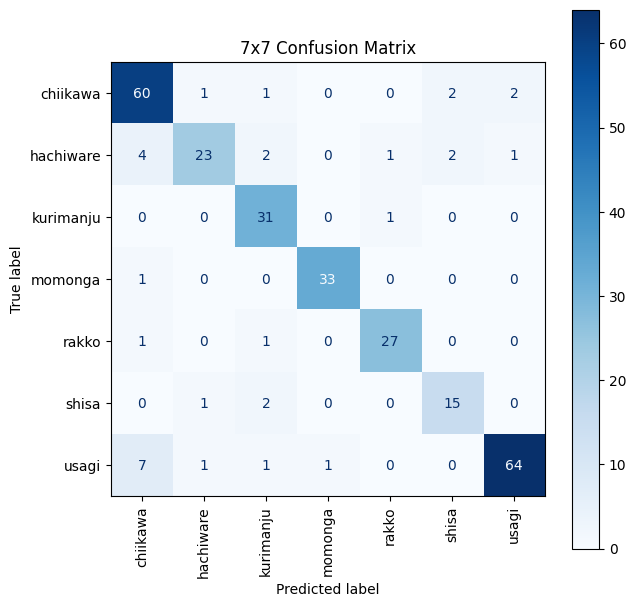

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

num_classes = 7  # 改為你的類別數
labels = ['chiikawa', 'hachiware', 'kurimanju', 'momonga', 'rakko', 'shisa', 'usagi']  # 類別名稱

def read_first_class(filepath):
    if not os.path.exists(filepath): return None
    with open(filepath, 'r') as f:
        lines = f.readlines()
        if not lines: return None
        return int(float(lines[0].split()[0]))

# 改這
true_dir = "/content/resized_dataset/test/labels" # label path
pred_dir = "runs/detect/exp2/labels" # pred path

y_true = []
y_pred = []

for file in sorted(os.listdir(true_dir)):
    true_path = os.path.join(true_dir, file)
    pred_path = os.path.join(pred_dir, file)

    true_cls = read_first_class(true_path)
    pred_cls = read_first_class(pred_path)

    if true_cls is not None and pred_cls is not None:
        y_true.append(true_cls)
        y_pred.append(pred_cls)

# 計算 7x7 混淆矩陣
cm = confusion_matrix(y_true, y_pred, labels=list(range(num_classes)))

# 繪圖
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(7, 7))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title("7x7 Confusion Matrix")
plt.show()

In [ ]:
import zipfile
import os

# 你的上傳路徑
zip_path = "/content/exp2.zip"
extract_path = "/content/exp2_labels"

# 解壓縮
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ 解壓完成！推論標籤位置：", extract_path)

✅ 解壓完成！推論標籤位置： /content/exp2_labels


In [ ]:
from collections import defaultdict
import os

true_dir = "/content/resized_dataset/test/labels"
pred_dir = "/content/exp2_labels/exp2/labels"
num_classes = 7

# === 統計變數初始化 ===
class_tp = defaultdict(int)
class_fp = defaultdict(int)
class_fn = defaultdict(int)
correct_per_class = [0] * num_classes
total_per_class = [0] * num_classes

total_correct = 0
total_preds = 0
total_labels = 0

def read_labels_from_txt(path):
    if not os.path.exists(path):
        return set()
    with open(path, 'r') as f:
        return set(int(float(line.strip().split()[0])) for line in f if line.strip())

# === 計算統計 ===
for filename in os.listdir(true_dir):
    if not filename.endswith(".txt"):
        continue
    gt_labels = read_labels_from_txt(os.path.join(true_dir, filename))
    pred_labels = read_labels_from_txt(os.path.join(pred_dir, filename))

    for c in range(num_classes):
        if c in gt_labels:
            total_per_class[c] += 1
            if c in pred_labels:
                correct_per_class[c] += 1
                class_tp[c] += 1
            else:
                class_fn[c] += 1
        elif c in pred_labels:
            class_fp[c] += 1

    # Micro-averaged
    total_correct += len(gt_labels & pred_labels)
    total_preds += len(pred_labels)
    total_labels += len(gt_labels)

# === 評估指標 ===
per_label_accuracy = sum(correct_per_class[i] / (total_per_class[i] + 1e-8) for i in range(num_classes)) / num_classes
precision = total_correct / (total_preds + 1e-8)
recall = total_correct / (total_labels + 1e-8)
f1 = 2 * precision * recall / (precision + recall + 1e-8)

print(f"\n🎯 Per-label Accuracy: {per_label_accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🎯 Recall:    {recall:.4f}")
print(f"🎯 F1-score:  {f1:.4f}")

# === Per-class 詳細輸出 ===
print("\n📊 Per-class Metrics:\n")
header = f"{'Class':<8}{'TP':<6}{'FP':<6}{'FN':<6}{'Precision':<12}{'Recall':<12}{'F1-score':<10}{'Acc':<10}"
print(header)
print("-" * len(header))

for c in range(num_classes):
    tp = class_tp[c]
    fp = class_fp[c]
    fn = class_fn[c]
    acc = correct_per_class[c] / (total_per_class[c] + 1e-8)
    prec = tp / (tp + fp + 1e-8)
    rec = tp / (tp + fn + 1e-8)
    f1c = 2 * prec * rec / (prec + rec + 1e-8) if (prec + rec) else 0

    print(f"{c:<8}{tp:<6}{fp:<6}{fn:<6}{prec:<12.4f}{rec:<12.4f}{f1c:<10.4f}{acc:<10.4f}")


🎯 Per-label Accuracy: 0.9764
🎯 Precision: 0.9543
🎯 Recall:    0.9709
🎯 F1-score:  0.9625

📊 Per-class Metrics:

Class   TP    FP    FN    Precision   Recall      F1-score  Acc       
----------------------------------------------------------------------
0       76    7     5     0.9157      0.9383      0.9268    0.9383    
1       42    2     3     0.9545      0.9333      0.9438    0.9333    
2       41    2     0     0.9535      1.0000      0.9762    1.0000    
3       39    0     1     1.0000      0.9750      0.9873    0.9750    
4       34    1     0     0.9714      1.0000      0.9855    1.0000    
5       20    4     0     0.8333      1.0000      0.9091    1.0000    
6       82    0     1     1.0000      0.9880      0.9939    0.9880    
